# 📺 Netflix Titles Analysis

This project analyzes the Netflix dataset to explore trends in content production across years, genres, and countries. The aim is to demonstrate proficiency in data exploration, cleaning, and visualization using Pandas and Matplotlib.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pandas is a powerful library for data analysis and manipulation.
It allows you to work with data in tables (called DataFrames), similar to Excel or SQL.

Matplotlib is a plotting library used to create charts and graphs.

pyplot is a module in matplotlib, and we usually give it the alias plt.

Seaborn is built on top of Matplotlib and is used for statistical data visualization.

In [5]:
#set up plot style

sns.set(style="darkgrid")

#Load dataset

df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# Preview data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Intial Data Inspection

In [9]:
#Basic info
df.info()

#check for missimg values 
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We see that `director`, `cast`, and `country` have many missing values. We'll keep them for now but treat them carefully in the analysis.


In [11]:

#Quick statistics
#df.describe(include='all')
#show summary statistics for columns that have text (string/object) data in the DataFrame df
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## Data Cleaning

In [12]:
#drop duplicates if any
df.drop_duplicates(inplace=True)

In [15]:
#fill missing 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

In [18]:
# Fill missing 'director' with 'Not Specified'
df['director'].fillna('Not Specified', inplace=True)



In [19]:
# Fill missing 'cast' with 'Not Available'
df['cast'].fillna('Not Available', inplace=True)

In [23]:
#Convert 'date_added' to datetime
#df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
#.str.strip() removes extra spaces at the start or end of each date string.

#errors='coerce' tells pandas to replace invalid or unparseable dates with NaT (like null for datetime).

In [26]:
#Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year

In [29]:
df['month_added'] = df['date_added'].dt.month


## Exploratory Data Analysis (EDA)

A. Type of Content (TV Show vs. Movie)

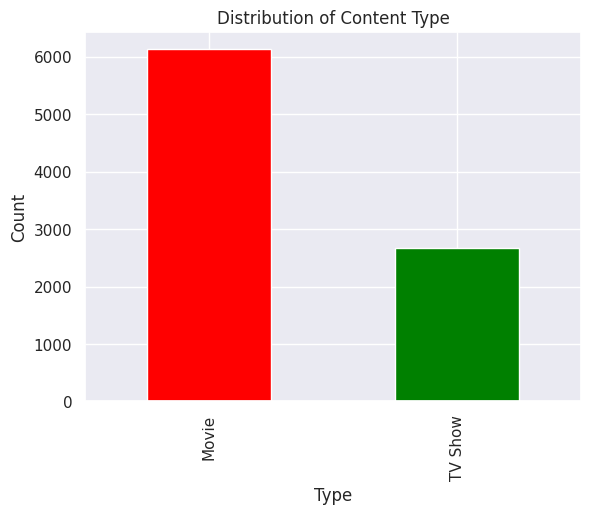

In [32]:
df['type'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


B. Content Over Time

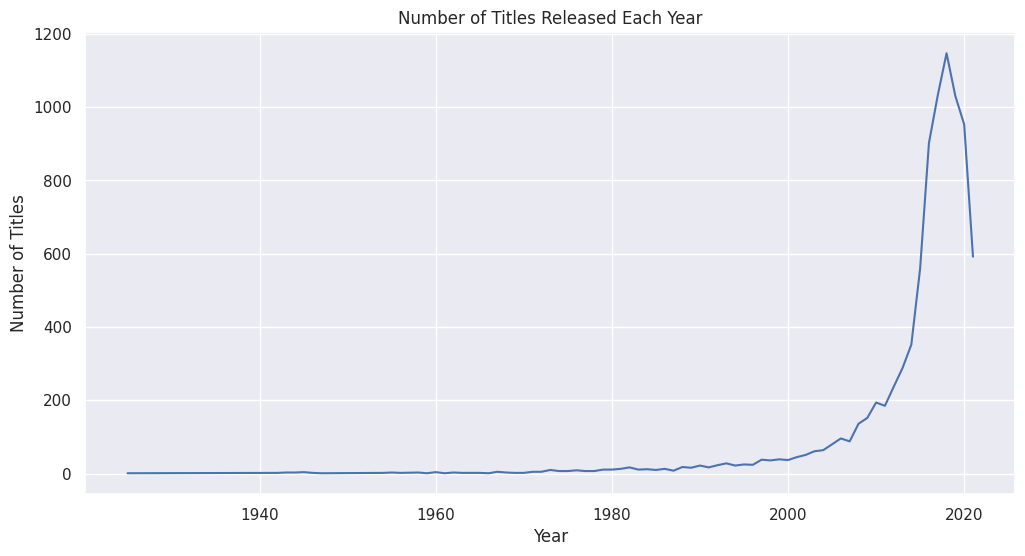

In [33]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


C. Top 10 Countries Producing Content
python
Copy code


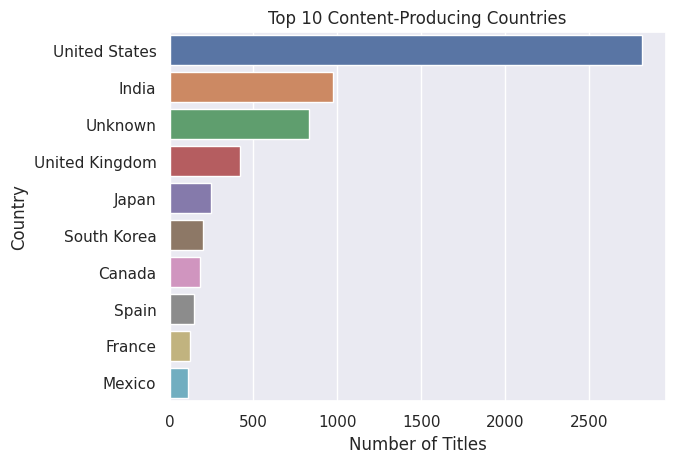

In [37]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


D. Most Common Genres

In [38]:
#Break down genres from 'listed_in' (split by comma)
from collections import Counter

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,Not Specified,Not Available,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


Python class used for counting the frequency of elements in a collection, like a list, string, or any iterable.

It works like a dictionary, where:

Keys = the unique items

Values = how many times each item appears

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


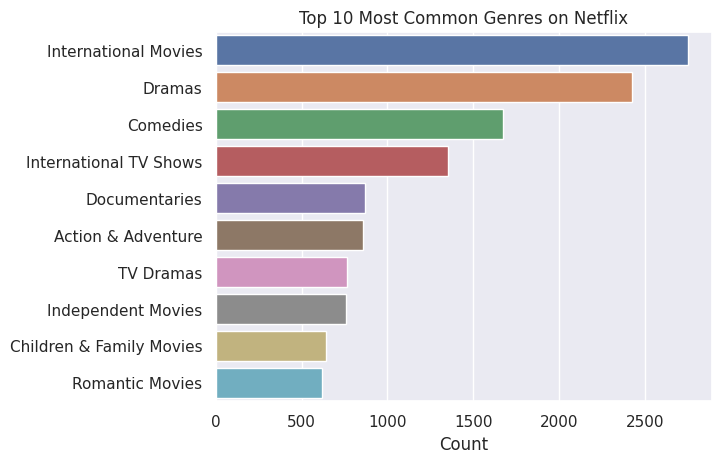

In [40]:
# Break down genres from 'listed_in' (split by comma)
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist] #This is a flattening list comprehension — it takes the list of lists and creates one flat list of all individual genres. 
genre_counts = Counter(flat_genres)

# Top 10 genres
top_genres = genre_counts.most_common(10)

# Plot
labels, values = zip(*top_genres) #Unzips the list of pairs into two separate lists:

#labels: list of genre names

#values: list of their corresponding counts
sns.barplot(x=list(values), y=list(labels))
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.show()


E. Titles Added Over Time

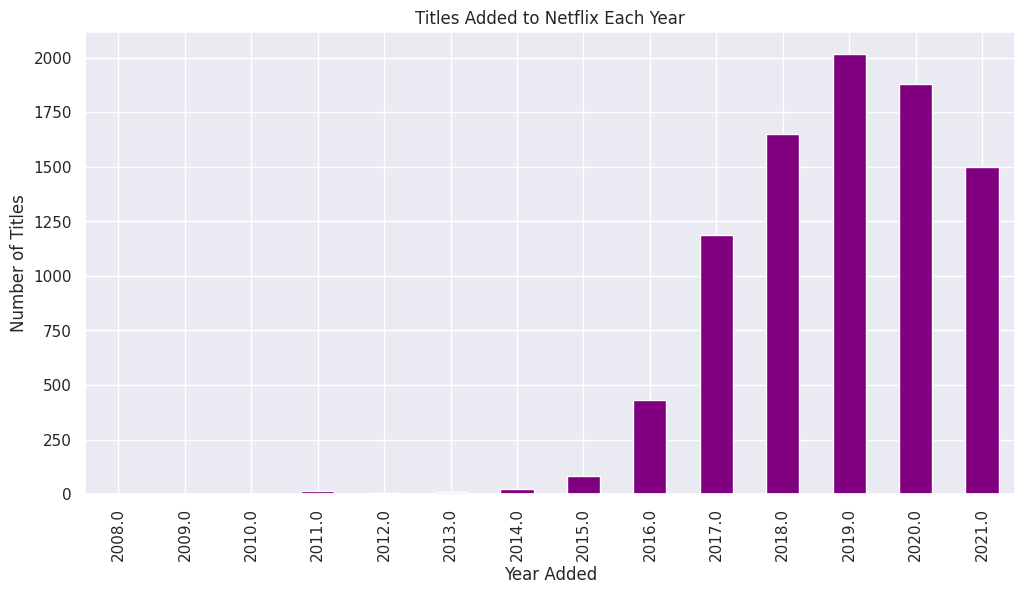

In [41]:
titles_per_year = df['year_added'].value_counts().sort_index() #sorts the years chronologically
titles_per_year.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


## 📌 Conclusions

- The majority of content on Netflix is movies.
- Netflix added the most content in recent years (peak in 2019-2020).
- The U.S. dominates in terms of content, but India and the UK follow.
- Drama, International Movies, and Documentaries are the most common genres.
- The dataset is rich but contains many missing values, especially for directors and cast.

This project demonstrates data analysis skills using Pandas, data cleaning techniques, and basic data visualization with Matplotlib and Seaborn.
